In [1]:
import numpy as np
import pickle

# Load arrays
xtrain_p = np.load("artifacts2/xtrain_p.npy")
xtest_p = np.load("artifacts2/xtest_p.npy")
ytrain = np.load("artifacts2/ytrain.npy" , allow_pickle=True)
ytest = np.load("artifacts2/ytest.npy" , allow_pickle=True)

# Load preprocessor if needed
with open("artifacts2/preprocessor.pkl", "rb") as f:
    preprocessor = pickle.load(f)

# Load feature names (optional)
with open("artifacts2/feature_names.pkl", "rb") as f:
    feature_names = pickle.load(f)


In [2]:
xtrain_p.shape, xtest_p.shape, ytrain.shape, ytest.shape

((708, 92), (177, 92), (708,), (177,))

In [3]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter=1000 , class_weight='balanced' , random_state = 42)
log_clf.fit(xtrain_p , ytrain)

y_pred_log = log_clf.predict(xtest_p)

print("Logistic Regression Accuracy:", accuracy_score(ytest , y_pred_log))

print(classification_report(ytest , y_pred_log))

Logistic Regression Accuracy: 0.4180790960451977
              precision    recall  f1-score   support

      female       0.41      0.41      0.41        88
        male       0.42      0.43      0.42        89

    accuracy                           0.42       177
   macro avg       0.42      0.42      0.42       177
weighted avg       0.42      0.42      0.42       177



In [5]:
log_clf.score(xtrain_p , ytrain)

0.6398305084745762

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(xtrain_p, ytrain)
y_pred_rf = rf_clf.predict(xtest_p)

print("Random Forest Accuracy:", accuracy_score(ytest, y_pred_rf))
print(classification_report(ytest, y_pred_rf))


Random Forest Accuracy: 0.4519774011299435
              precision    recall  f1-score   support

      female       0.45      0.51      0.48        88
        male       0.45      0.39      0.42        89

    accuracy                           0.45       177
   macro avg       0.45      0.45      0.45       177
weighted avg       0.45      0.45      0.45       177



In [7]:
rf_clf.score(xtrain_p , ytrain)

0.9943502824858758

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_clf.fit(xtrain_p, ytrain)
y_pred_gb = gb_clf.predict(xtest_p)

print("Gradient Boosting Accuracy:", accuracy_score(ytest, y_pred_gb))
print(classification_report(ytest, y_pred_gb))


Gradient Boosting Accuracy: 0.4689265536723164
              precision    recall  f1-score   support

      female       0.47      0.50      0.48        88
        male       0.47      0.44      0.45        89

    accuracy                           0.47       177
   macro avg       0.47      0.47      0.47       177
weighted avg       0.47      0.47      0.47       177



In [9]:
gb_clf.score(xtrain_p , ytrain)

0.9293785310734464

In [10]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    alpha=0.0005,
    batch_size=64,
    learning_rate_init=0.001,
    max_iter=300,
    random_state=42
)

mlp_clf.fit(xtrain_p, ytrain)
y_pred_mlp = mlp_clf.predict(xtest_p)

print("MLP Accuracy:", accuracy_score(ytest, y_pred_mlp))
print(classification_report(ytest, y_pred_mlp))


MLP Accuracy: 0.4915254237288136
              precision    recall  f1-score   support

      female       0.49      0.53      0.51        88
        male       0.49      0.45      0.47        89

    accuracy                           0.49       177
   macro avg       0.49      0.49      0.49       177
weighted avg       0.49      0.49      0.49       177



In [11]:
mlp_clf.score(xtrain_p , ytrain)

1.0

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

gb_clf2 = GradientBoostingClassifier(
    n_estimators=500,        # more trees
    learning_rate=0.03,     # smaller steps
    max_depth=5,            # more interactions
    min_samples_leaf=5,     # allow finer splits
    subsample=0.8,          # stochastic boosting
    random_state=42
)

gb_clf2.fit(xtrain_p, ytrain)
y_pred_gb2 = gb_clf2.predict(xtest_p)

print("Complex Gradient Boosting Accuracy:", accuracy_score(ytest, y_pred_gb2))
print(classification_report(ytest, y_pred_gb2))


Complex Gradient Boosting Accuracy: 0.4858757062146893
              precision    recall  f1-score   support

      female       0.48      0.55      0.51        88
        male       0.49      0.43      0.46        89

    accuracy                           0.49       177
   macro avg       0.49      0.49      0.48       177
weighted avg       0.49      0.49      0.48       177



In [13]:
gb_clf2.score(xtrain_p , ytrain)

1.0

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

ytrain_enc = le.fit_transform(ytrain)
ytest_enc = le.transform(ytest)

print("Class mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Class mapping: {'female': 0, 'male': 1}


In [15]:
from xgboost import XGBClassifier



xgb = XGBClassifier(
    n_estimators=600,
    max_depth=6,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    random_state=42
)

xgb.fit(xtrain_p, ytrain_enc)
y_pred_xgb = xgb.predict(xtest_p)

print("XGBoost Accuracy:", accuracy_score(ytest_enc, y_pred_xgb))
print(classification_report(ytest_enc, y_pred_xgb , target_names=le.classes_ ))

XGBoost Accuracy: 0.4745762711864407
              precision    recall  f1-score   support

      female       0.47      0.50      0.49        88
        male       0.48      0.45      0.46        89

    accuracy                           0.47       177
   macro avg       0.47      0.47      0.47       177
weighted avg       0.47      0.47      0.47       177



In [16]:
xgb.score(xtrain_p , ytrain_enc)

1.0

In [17]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(xtrain_p, ytrain)
print("Dummy accuracy:", dummy.score(xtest_p, ytest))


Dummy accuracy: 0.5028248587570622


All model are giving very poor performance on the testing dataset. 

Based on the available behavioural and booking data , gender is not predicatably encoded in the user travel patterns.

“Despite extensive feature engineering and model tuning, predictive performance remained close to baseline, indicating that the dataset does not contain strong gender-discriminative information.”

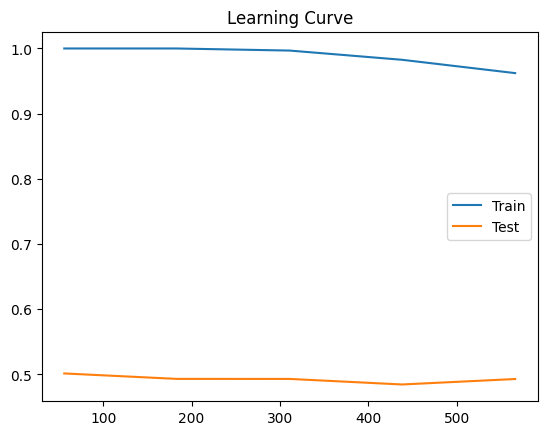

In [18]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    gb_clf, xtrain_p, ytrain, cv=5, scoring="accuracy", n_jobs=-1
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test")
plt.legend()
plt.title("Learning Curve")
plt.show()


In [19]:
# Saving the best model

with open("artifacts2/best_model.pkl", "wb") as f:
    pickle.dump(gb_clf , f)